In [43]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from pathlib import Path


In [44]:
data_path = Path("..") / "FPL-Points-Predictions" / "FPL_data_untidy.csv"
data = pd.read_csv(data_path)
data.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw,season,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,starts,modified,mng_clean_sheets,mng_draw,mng_goals_scored,mng_loss,mng_underdog_draw,mng_underdog_win,mng_win,clearances_blocks_interceptions,defensive_contribution,recoveries,tackles
0,Bernd Leno,GK,Arsenal,3.6,0,0,11,0,0.0,1,1,2,0,1.2,11.8,2021-08-13 19:00:00+00:00,90,3,0,0,0,0,1,1,153122,0,2,0,1,0,0,0,50,False,0,1,2021-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bernd Leno,GK,Arsenal,1.5,0,0,17,0,0.0,1,18,2,0,2.4,24.2,2021-08-22 15:30:00+00:00,90,6,0,0,0,0,2,3,144885,2,0,0,2,-25816,2627,28443,50,True,0,2,2021-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bernd Leno,GK,Arsenal,0.8,0,0,20,0,0.0,1,24,5,0,4.3,43.0,2021-08-28 11:30:00+00:00,90,12,0,0,0,0,3,5,136757,0,5,0,1,-14559,5164,19723,49,False,0,3,2021-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bernd Leno,GK,Arsenal,2.0,0,0,0,0,0.0,1,31,0,0,0.0,0.0,2021-09-11 14:00:00+00:00,0,15,0,0,0,0,4,0,153130,0,1,0,0,6564,35360,28796,49,True,0,4,2021-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bernd Leno,GK,Arsenal,1.8,0,0,0,0,0.0,1,43,0,0,0.0,0.0,2021-09-18 14:00:00+00:00,0,5,0,0,0,0,5,0,129851,1,0,0,0,-23847,4822,28669,49,False,0,5,2021-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data.isna().sum().sum()

np.int64(1444306)

In [46]:
data.isna().mean()[data.isna().mean()>0]

expected_assists                   0.199639
expected_goal_involvements         0.199639
expected_goals                     0.199639
expected_goals_conceded            0.199639
starts                             0.199639
modified                           0.640780
mng_clean_sheets                   0.894661
mng_draw                           0.894661
mng_goals_scored                   0.894661
mng_loss                           0.894661
mng_underdog_draw                  0.894661
mng_underdog_win                   0.894661
mng_win                            0.894661
clearances_blocks_interceptions    0.857349
defensive_contribution             0.857349
recoveries                         0.857349
tackles                            0.857349
dtype: float64

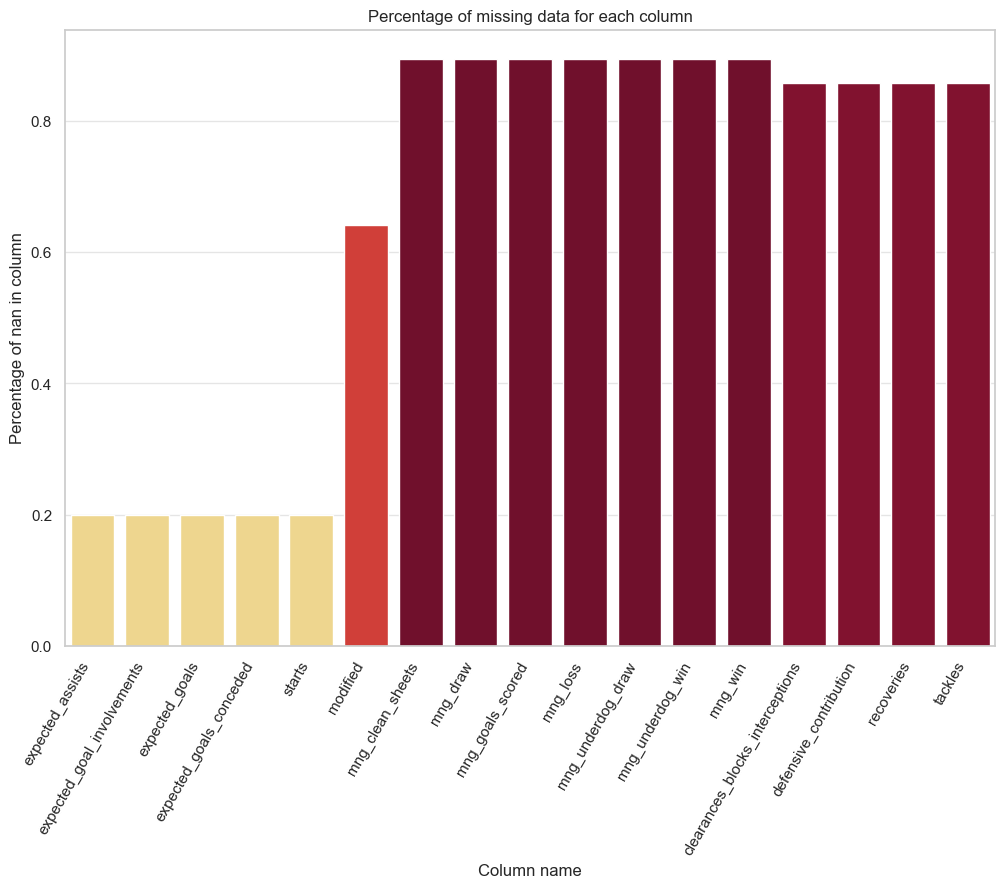

In [47]:
plt.figure(figsize=(12, 8))
s = data.isna().mean()
s = s[s > 0]

sns.barplot(x=s.index, y=s, hue=s.index, legend=False, palette=list(plt.cm.YlOrRd((s / s.max()))))
plt.xlabel("Column name")
plt.ylabel("Percentage of nan in column")
plt.title("Percentage of missing data for each column")

plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', alpha=0.5);

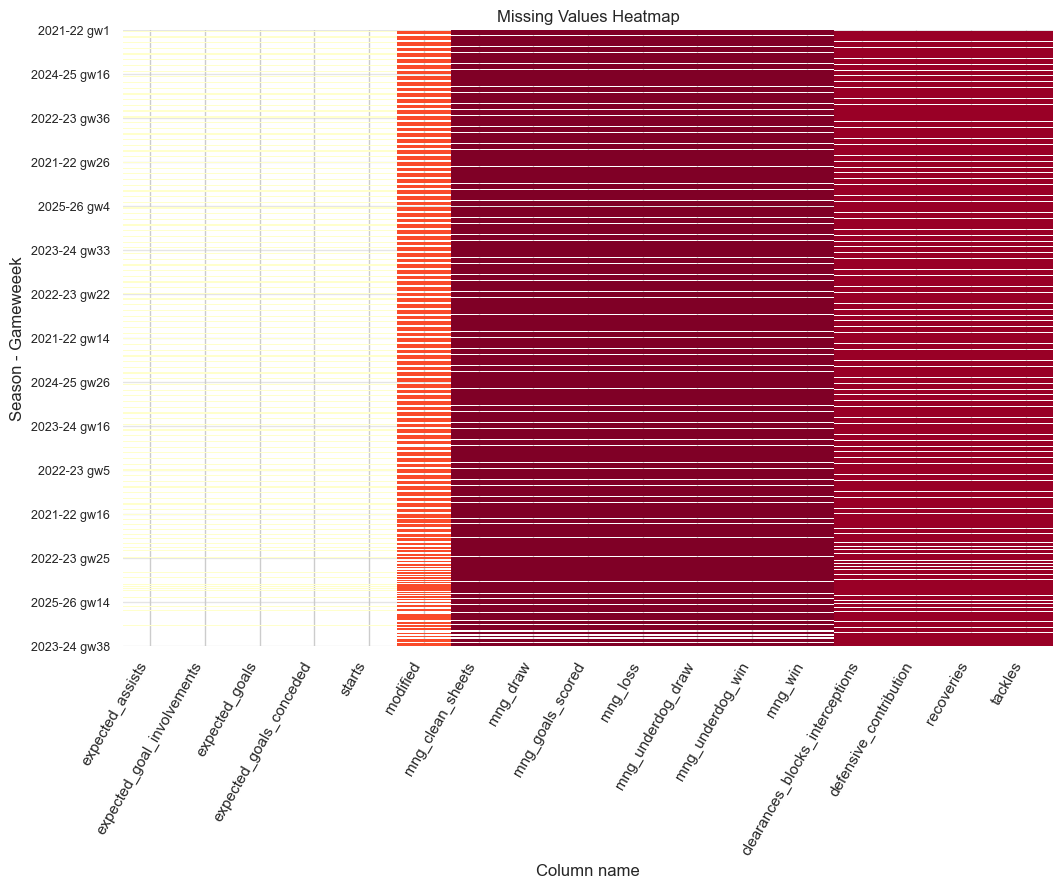

In [48]:
d = data.loc[:, data.isna().any()]
labels = data['season'].astype(str) + " gw" + data['gw'].astype(str)

plt.figure(figsize=(12, 8))
sns.heatmap(d.isna() * d.isna().mean(), mask=d.notna(), cmap='YlOrRd',
            cbar=False, yticklabels=False)

plt.title("Missing Values Heatmap")
plt.xticks(rotation=60, ha='right')

n_ticks = 15
y_positions = np.linspace(0, d.shape[0]-1, n_ticks)

plt.yticks(y_positions, labels.iloc[y_positions.astype(int)], fontsize=9)
plt.ylabel("Season - Gameweeek")
plt.xlabel("Column name")

plt.grid(axis='y', alpha=0.5)

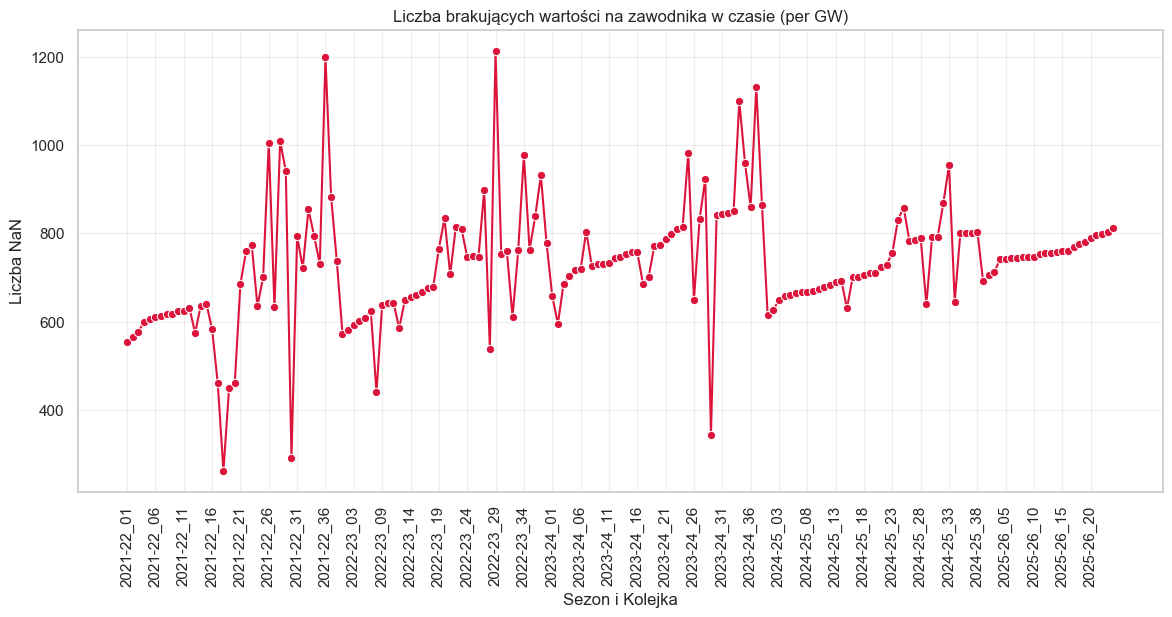

In [49]:
plt.figure(figsize=(14, 6))

# Wykres
sns.lineplot(data=data.isna().sum(axis=1).groupby(data['season'].astype(str) + "_" + data['gw'].astype(str).str.zfill(2)).count(),
             color='crimson', marker='o')

plt.title("Liczba brakujących wartości na zawodnika w czasie (per GW)")
plt.ylabel("Liczba NaN")
plt.xlabel("Sezon i Kolejka")

plt.xticks(range(0, data[['season', 'gw']].drop_duplicates().shape[0], 5), rotation=90)

plt.grid(alpha=0.3)

In [50]:
data_w_nan = data.copy()

In [51]:
data_w_nan = data_w_nan.assign(
    nan_flag = np.where(data_w_nan[s[s < 0.2].index.to_list()].isna().any(axis=1), 1, 0)
)

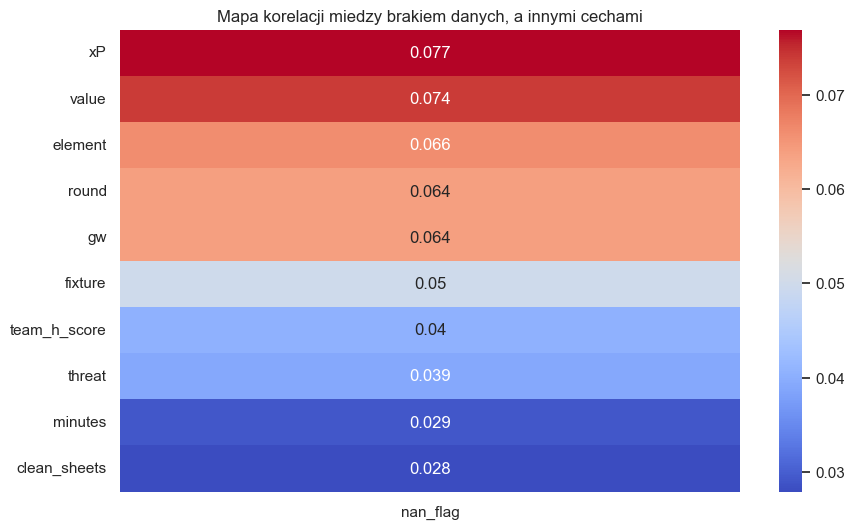

In [52]:
plt.figure(figsize=(10, 6))
plt.title("Mapa korelacji miedzy brakiem danych, a innymi cechami")
sns.heatmap(pd.DataFrame(data_w_nan.drop(columns=data_w_nan.select_dtypes(include=["object", "string"])).corr()\
                         .nan_flag.apply(np.abs).sort_values(ascending=False).dropna().head(11)).drop(["nan_flag"], axis=0),
            annot=True,
            cmap="coolwarm");

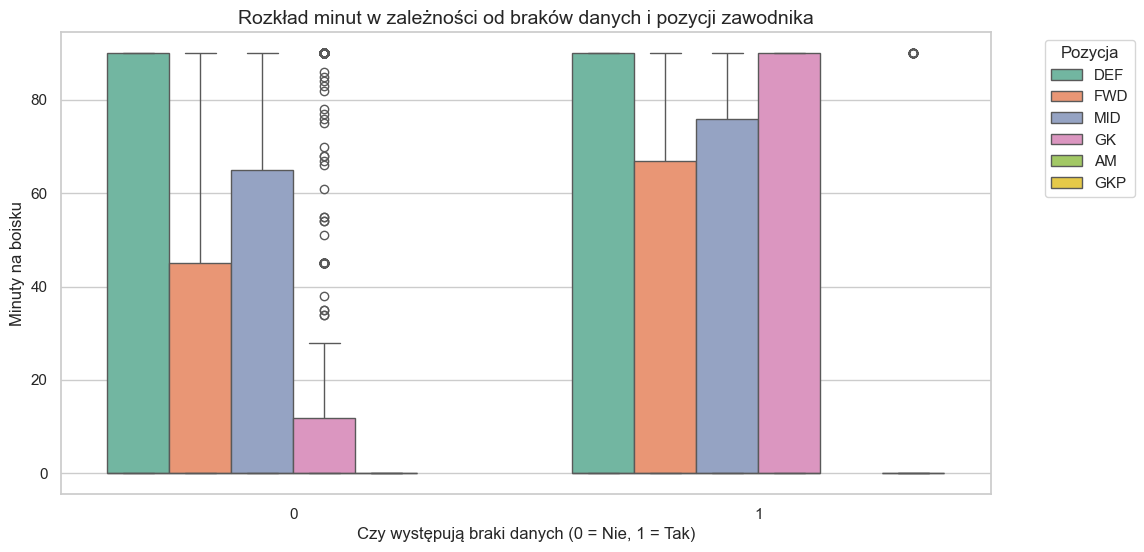

In [57]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=data_w_nan,
    x='nan_flag',
    y='minutes',
    hue='position',
    palette='Set2'

)

plt.title("Rozkład minut w zależności od braków danych i pozycji zawodnika", fontsize=14)
plt.xlabel("Czy występują braki danych (0 = Nie, 1 = Tak)", fontsize=12)
plt.ylabel("Minuty na boisku", fontsize=12)

plt.legend(title='Pozycja', bbox_to_anchor=(1.05, 1), loc='upper left');
